In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


Dado que estoy implementando en Colab, descargo los archivos necesarios desde el repo de Github.

In [9]:
!wget CoordCrom_1.png https://github.com/juannieu/VPC1/raw/main/TP1/CoordCrom_1.png
!wget CoordCrom_1.png https://github.com/juannieu/VPC1/raw/main/TP1/CoordCrom_2.png
!wget CoordCrom_1.png https://github.com/juannieu/VPC1/raw/main/TP1/CoordCrom_3.png
!wget CoordCrom_1.png https://github.com/juannieu/VPC1/raw/main/TP1/WP_B.png
!wget CoordCrom_1.png https://github.com/juannieu/VPC1/raw/main/TP1/WP_O.png
!wget CoordCrom_1.png https://github.com/juannieu/VPC1/raw/main/TP1/WP_R.png


--2022-03-31 16:47:17--  http://coordcrom_1.png/
Resolving coordcrom_1.png (coordcrom_1.png)... failed: Name or service not known.
wget: unable to resolve host address ‘coordcrom_1.png’
--2022-03-31 16:47:17--  https://github.com/juannieu/VPC1/raw/main/TP1/CoordCrom_1.png
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/juannieu/VPC1/main/TP1/CoordCrom_1.png [following]
--2022-03-31 16:47:17--  https://raw.githubusercontent.com/juannieu/VPC1/main/TP1/CoordCrom_1.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1488254 (1.4M) [image/png]
Saving to: ‘CoordCrom_1.png’

CoordCrom_1.png     100%[==

TP1. Para las imágenes que serán proporcionadas de Tito se pide:

1. Implementar el algoritmo de pasajea coordenadas cromáticas para librarnos de las variaciones de contraste.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in multiply
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in multiply


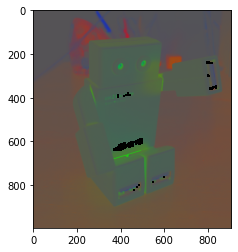

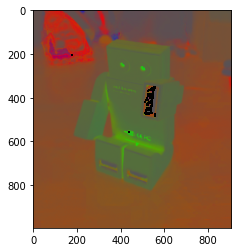

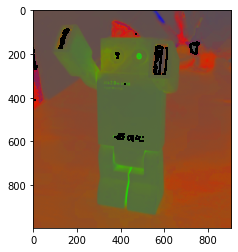

In [15]:
#Implementación de paso a coordenadas cromáticas.

#Creo una lista con los nombres de las imagenes que quiero procesar y la recorro. 
nombres=['CoordCrom_1.png','CoordCrom_2.png','CoordCrom_3.png']
for elNombre in nombres:

#Leo la Imagen
  img=cv.imread(elNombre)
#Paso de BGR a RGB
  img_rgb=cv.cvtColor(img,cv.COLOR_BGR2RGB)
#Obtengo los valores para cada uno de los canales.
  r, g, b = cv.split(img_rgb)
#Los divido entre3  para que no pasen de 255
  r=r/3
  g=g/3
  b=b/3

#Calculo el valor por el cual multipico a cada canal y hago la respectiva multiplicación
  suma=1/((r)+(g)+(b))
  canal_r=np.multiply(r,suma)
  canal_g=np.multiply(g,suma)
  canal_b=np.multiply(b,suma)

#Volvemos a juntar los 3 canales después de procesar
  img_resp=cv.merge((canal_r,canal_g,canal_b))

#Mostramos la imagen resultante
  plt.figure(2)
  plt.imshow(img_resp)
  plt.show()

2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


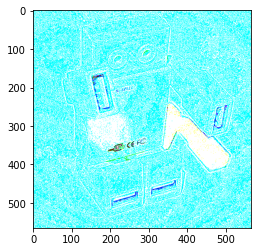

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


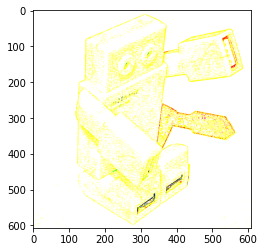

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


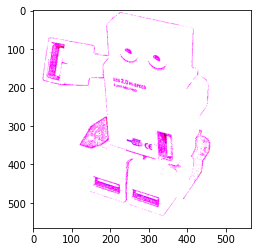

In [23]:
#Implementación de White Patch.

#Creo una lista con los nombres de las imagenes que quiero procesar y la recorro. 
nombres=['WP_B.png','WP_O.png','WP_R.png']
for elNombre in nombres:

  #Abro la Imagen
  imgWP=cv.imread(elNombre)

  img_rgb=cv.cvtColor(imgWP,cv.COLOR_BGR2RGB)

  #Obtengo los valores para cada uno de los canales.
  r, g, b = cv.split(img_rgb)
  
  #Hacemos los cálculos usando la fórmula de White Patch
  r_wp=np.multiply((255/np.ndarray.max(r)),r)
  g_wp=np.multiply((255/np.ndarray.max(g)),g)
  b_wp=np.multiply((255/np.ndarray.max(b)),b)

  #Volvemos a juntar los 3 canales después de procesar
  imgEntrega=cv.merge((r_wp,g_wp,b_wp))

  #Mostramos la imagen resultante
  plt.figure()
  plt.imshow(imgEntrega)
  plt.show()